<a href="https://colab.research.google.com/github/leah-n/Customer-Churn-Prediction-Model-for-a-Telco-Company/blob/Model-Building-and-Selection/Customer_Churn_Model_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### Project Objective
The first objective of this project is to analyse the data and provide a description of the main characteristics.  This dataset will be used by you in the future to build a model that predicts which customers are at risk of churn, our second objective. As such, our exploratory phase might aim to determine which factors are more relevant to the phenomenon of customer churn


### Dataset Description 
The Telco Dataset contains information about customers of a Telco company and their subscriptions. This telecom company appears to have provided home, phone and Internet services to 7,043 customers in the third quarter. The dataset shows which customers have left, stayed or signed up for their service.

The characteristics of the customers given include:  

1. customer_ID:Customer ID  
2. gender:	Whether the customer is a male or a female  
3. senior_citizen: Whether the customer is a senior citizen or not (1, 0)  
4. partner: Whether the customer has a partner or not (Yes, No)     
5. dependents: Whether the customer has dependents or not (Yes, No)  
6. tenure : Number of months the customer has stayed with the company    
7. phone_Service: Whether the customer has a phone service or not (Yes, No)  
8. multiple_lines: Whether the customer has multiple lines or not (Yes, No, No phone service)  
9. internet: Customer’s internet service provider (DSL, Fiber optic, No)    
10. security_online: Whether the customer has online security or not (Yes, No, No internet service)  
11. backup_online: Whether the customer has online backup or not (Yes, No, No internet service)  
12. device_protection: Whether the customer has device protection or not (Yes, No, No internet service)  
13. tech_support: Whether the customer has tech support or not (Yes, No, No internet service)  
14. streaming_tv: Whether the customer has TV streaming  or not (Yes, No, No internet service)  
15. streaming_movies: Whether the customer movie streaming or not (Yes, No, No internet service)    
16. contract_type: The contract term of the customer (Month-to-month, One year, Two year)
17. paperless_billing: Whether the customer has paperless billing or not (Yes, No)  
18. payment_mode: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
19. charges_per_month: The amount charged to the customer monthly  
20. charges_total: The total amount charged to the customer  
21. churn: Whether the customer churned or not (Yes or No)  


### 1. Exploratory Data Analysis


### 1.1 Seting up our notebook


In [61]:
#loading required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import plotly.graph_objs as go
%matplotlib inline 
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy as sc
from scipy.stats import skew
from scipy.stats import kurtosis

In [30]:
#loading dataset 
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



### 1.2 Descriptive Analysis


In [31]:
df.info() #to give us a snapshot view of the data including the datafranes shape and size and datatypes present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.nunique() #How many unique values are there for each attribute

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [33]:
df.isnull().sum() #checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.describe() #summary statistics for numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 1.3 Summary of observations from the descriptive analysis 
1. Our target variable is churn for which we have 20 potential explanatory variables 
2. There are 7043 entries in our data set
3. There are no missing values in our data set 
4. Among the independent variables, most are objects apart from the following which are numeric:  
charges per month (float)    
tenure (int)  
Senior Citizen (int)  
5. Among the independent variables, all are categorical apart from the following:  
charges_total  
charges per month   
tenure  
6. The mixture of datatypes and categorical vs indicates that in our univariate/bivariate analysis, we may be unable to apply the same methods on all variables  

### 2. Univariate and Bivariate Analysis 
In our univariate analysis, we are concerned with the distributions of each independent variable.
Therefore, for each variable we ask:    
What is the distribution of customers within an attribute and are there any significant outliers. 
For the Bivariate analysis, we shall concern ourselves with the question of how each attribute relates with the target variable 

#### 2.1 Data Cleaning  

Although 0.15% of the data is relatively small, we are hesitant to exclude those entries that contain NaNs under the total charges column because they all display the same behaviour of not churning and form a part of a smaller subset 5174 customers who did not churn.


Typically we would impute that data the median or mean,however we find out that these rows have another interesting chacateristic. It appears that their tenure period is 0. It would therefore perhaps make sense that though they had subscribed to a monthly plan of some sort, since they did not finish a months tenure, they dropped off before they were charged. We therefore impute the missing values of charges total with 0

In [35]:
#changing charges total column from object to numerical data
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = df["TotalCharges"].astype(float)
df['TotalCharges'].isna().sum()

<ipython-input-35-0ae64bedc009>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].astype(float)


0

In [36]:

#change senior citizen from from int to object
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")
df["SeniorCitizen"].unique()

<ipython-input-36-dfe6511bda6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")


array(['No', 'Yes'], dtype=object)

In [37]:
#encoding churn, our target variable 
df["Churn"] = df["Churn"].apply(lambda x: 0 if x == "No" else 1)
df["Churn"].unique()

<ipython-input-37-bfcf6d916ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].apply(lambda x: 0 if x == "No" else 1)


array([0, 1])

In [38]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

#### 2.2 Univariate Analysis 

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


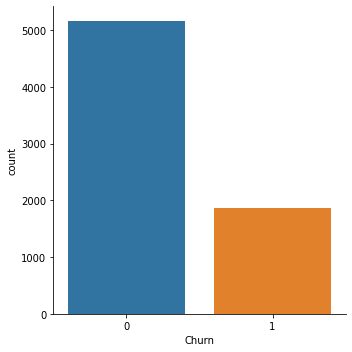

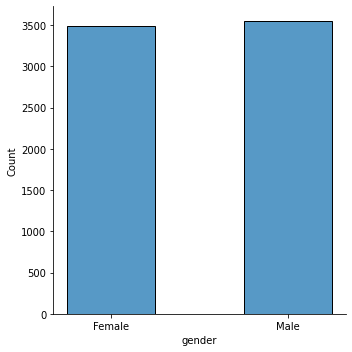

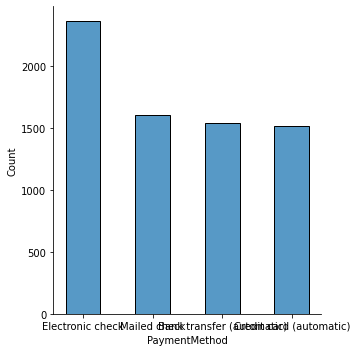

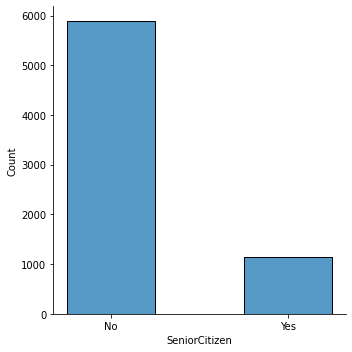

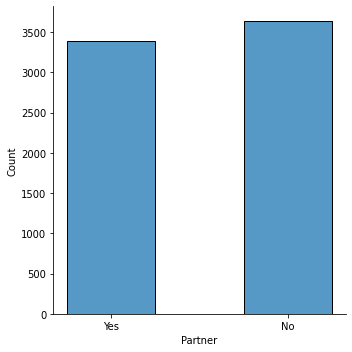

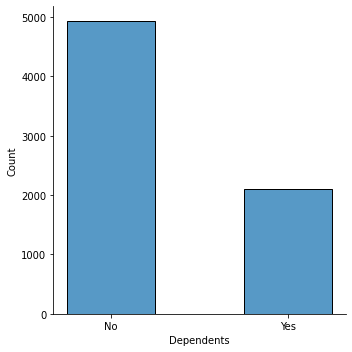

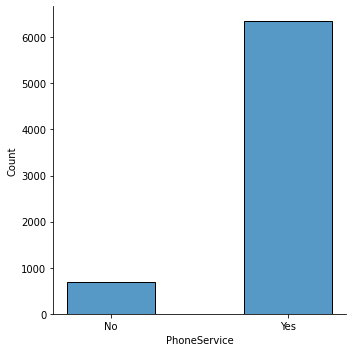

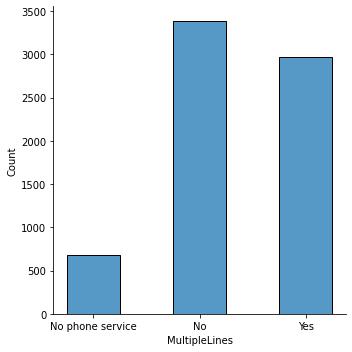

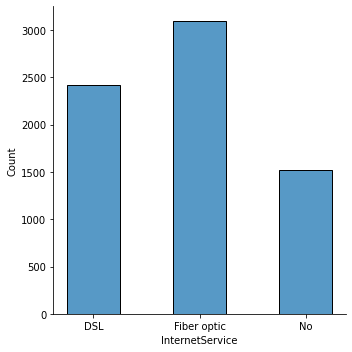

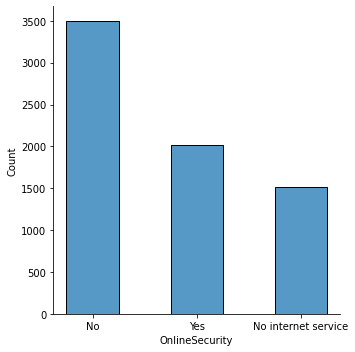

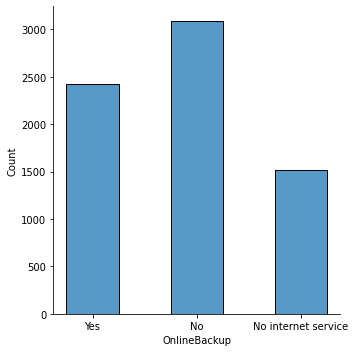

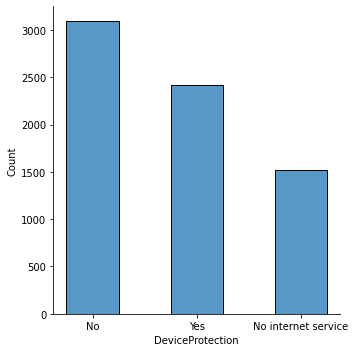

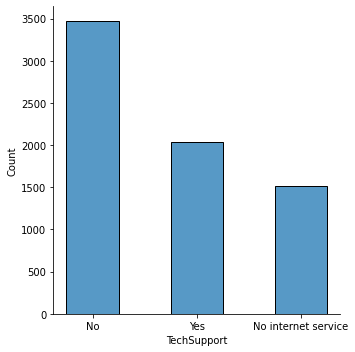

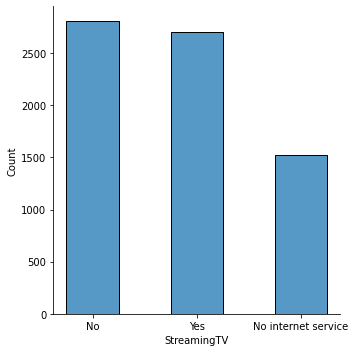

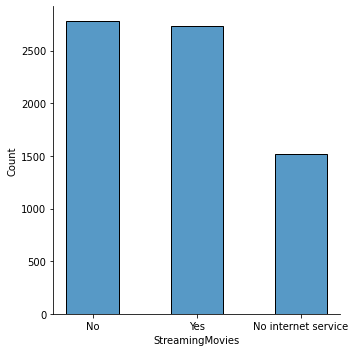

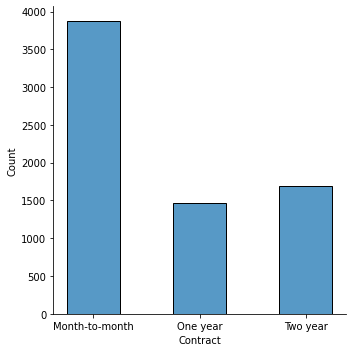

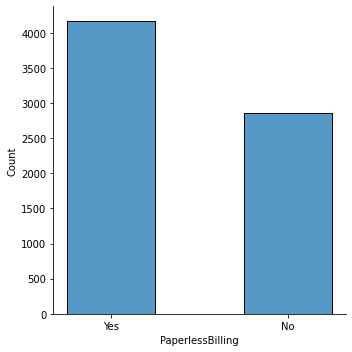

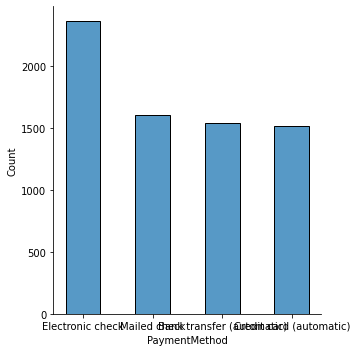

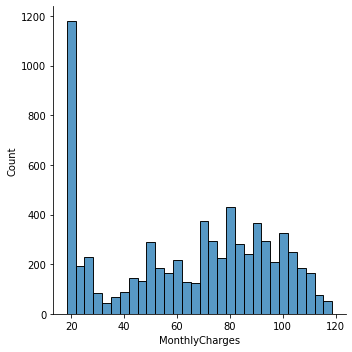

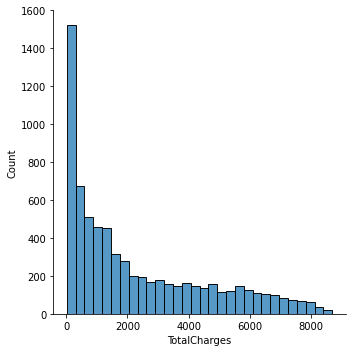

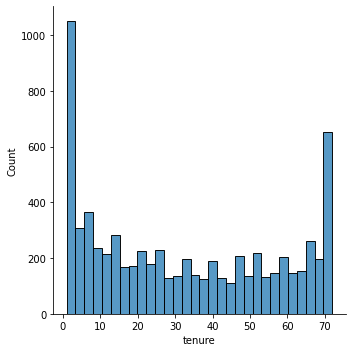

In [39]:
#generating a barplot to Compare Churn fugures using seaborn 
#we use a catplot as opposed to displot because its an array of 1s & 0s
sns.catplot (x = "Churn", kind = "count", data= df)
#we use a displot to visualise the distributions of all the rest of the features
sns.displot(df, x="gender", discrete=True, shrink=.5 )
sns.displot(df, x="PaymentMethod", discrete=True, shrink=.5 )
sns.displot(df, x ="SeniorCitizen", discrete = True, shrink =.5)
sns.displot(df, x="Partner", discrete= True, shrink =.5)
sns.displot(df, x="Dependents", discrete= True, shrink =.5)
sns.displot(df, x="PhoneService", discrete= True, shrink =.5)
sns.displot(df, x="MultipleLines", discrete= True, shrink =.5)
sns.displot(df, x="InternetService", discrete= True, shrink =.5)
sns.displot(df, x="OnlineSecurity", discrete= True, shrink =.5)
sns.displot(df, x="OnlineBackup", discrete= True, shrink =.5)
sns.displot(df, x="DeviceProtection", discrete= True, shrink =.5)
sns.displot(df, x="TechSupport", discrete= True, shrink =.5)
sns.displot(df, x="StreamingTV", discrete= True, shrink =.5)
sns.displot(df, x="StreamingMovies", discrete= True, shrink =.5)
sns.displot(df, x="Contract", discrete= True, shrink =.5)
sns.displot(df, x="PaperlessBilling", discrete= True, shrink =.5)
sns.displot(df, x="PaymentMethod", discrete= True, shrink =.5)
sns.displot(df, x="MonthlyCharges",  bins = 30)
sns.displot(df, x="TotalCharges",  bins = 30)
sns.displot(df, x="tenure", bins = 30)


#### 2.3 Bivariate Analysis 

In [40]:
#summary statistics on total charges grouped by whether or not the customer churned
df.groupby(["Churn"])["TotalCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


[Text(0.5, 1.0, 'Total Charges Categorized by Churn')]

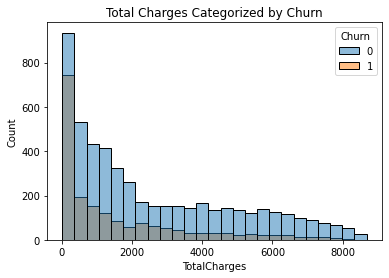

In [41]:
#visualising the total charges grouped by churn
sns.histplot(df, x = "TotalCharges", hue = "Churn").set(title="Total Charges Categorized by Churn")

In [42]:
#summary statistics on total charges grouped by whether or not the customer churned
df.groupby(["Churn"])["tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


<AxesSubplot:xlabel='tenure', ylabel='Count'>

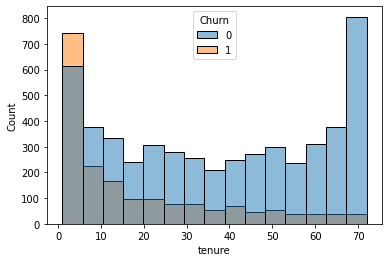

In [43]:
#visualising the tenure grouped by churn
sns.histplot(df, x='tenure', hue="Churn")

In [44]:
#summary statistics on total charges grouped by whether or not the customer churned
df.groupby(["Churn"])["MonthlyCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

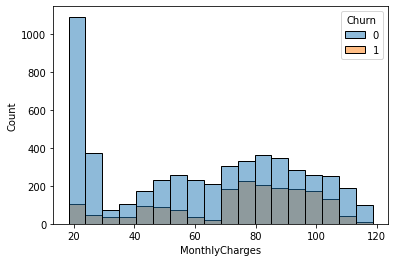

In [45]:
#visualising the tenure grouped by churn
sns.histplot(df, x='MonthlyCharges', hue="Churn")

#### 2.3 Data Transformation 

In [46]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

#transforming all the categorical variables using pd.get_dummies to encode
transformed_df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
transformed_df.head()


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [47]:
#obtain the correlation coefficients between all the features and the target variable, churn 
transformed_df.corr()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,0.005285,0.015683,0.381912,0.163386,0.007877,-0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.248033,-0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,0.000048,0.102411,0.319072,0.064653,0.113008,-0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,-0.008545,0.150541,-0.149982,-0.163128,0.011691,-0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,0.005285,-0.013779,0.000048,-0.008545,1.000000,-0.001819,-0.001379,0.010349,-0.007515,0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
SeniorCitizen_Yes,0.015683,0.219874,0.102411,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
Partner_Yes,0.381912,0.097825,0.319072,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.018397,-0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,0.163386,-0.112343,0.064653,-0.163128,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.007877,0.248033,0.113008,0.011691,-0.007515,0.008392,0.018397,-0.001078,1.000000,-1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.007877,-0.248033,-0.113008,-0.011691,0.007515,-0.008392,-0.018397,0.001078,-1.000000,1.000000,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


<AxesSubplot:>

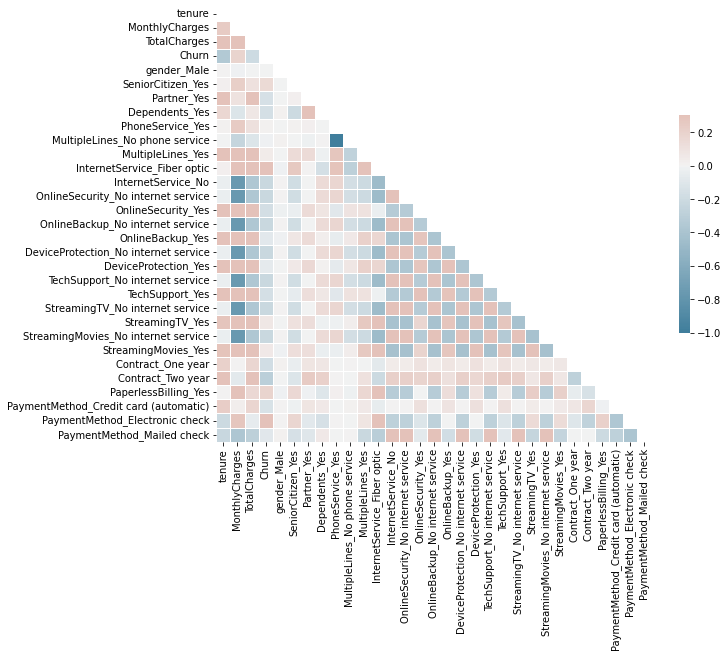

In [48]:
corr = transformed_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
           linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
# Get the 10 largest correlations
largest_corr = corr.unstack()["Churn"].sort_values(ascending=False)[:10]
print("10 largest correlations with target variable Churn:")
print(largest_corr)


10 largest correlations with target variable Churn:
Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
SeniorCitizen_Yes                 0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService_Yes                  0.011691
dtype: float64


In [50]:
# Get the 10 smallest correlations
smallest_corr = corr.unstack()["Churn"].sort_values()[:10]
print("10 smallest correlations with target variable Churn::")
print(smallest_corr)

10 smallest correlations with target variable Churn::
tenure                                 -0.354049
Contract_Two year                      -0.301552
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
TechSupport_No internet service        -0.227578
DeviceProtection_No internet service   -0.227578
OnlineSecurity_No internet service     -0.227578
InternetService_No                     -0.227578
OnlineBackup_No internet service       -0.227578
TotalCharges                           -0.199484
dtype: float64


Given the univariate and bivariate analysis above, the features that appear to have a relationship between themselves and the target variable, churn include:

InternetService_Fiber optic     
PaymentMethod_Electronic check  
MonthlyCharges                   
PaperlessBilling         
SeniorCitizen
tenure                                
Contract_Two year                     
StreamingMovies_No internet service    
StreamingTV_No internet service        
TechSupport_No internet service        
DeviceProtection_No internet service   
OnlineSecurity_No internet service     
InternetService_No                     
OnlineBackup_No internet service      
TotalCharges                          


### 3. Modelling 

Following our exploratory data analysis, we can now begin our model building process 

We begin with a baseline model that includes all the features and proceed with chosen features

Because this is a classification problem, we opt to use logistic regression analysis 

#### Model 1: Logistic Regression with all features(upsampled)

In [51]:
df_copy = df.copy()
#feature engineering here consists of dropping the customer ID column which is not informative of the churning behaviour we wish to investigate
df_copy.drop(["customerID", "Churn"], axis=1, inplace=True)

numerical_feats = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_feats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                   'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df_copy = pd.get_dummies(df_copy, columns=categorical_feats)
df_copy.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [52]:
#scaling our numerical features by standardising them along the mean


#fit_transform expects a 2D array where the first dimension represents the rows 
#(i.e., the observations) 
#and the second dimension represents the columns 
#(i.e., the features).
#using double brackets around feature (i.e., df_copy[[feature]]), 
#we create a new DataFrame that has a single column 
#(i.e., the column corresponding to feature) 
#but multiple rows (i.e., the number of observations in the original df_copy DataFrame). 
#This creates the required 2D array input for the fit_transform method.


scaler = StandardScaler()
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
for feature in numerical_features:
    df_copy[feature] = scaler.fit_transform(df_copy[[feature]])
df_copy

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,0.664868,-0.129180,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,1.612573,1.276493,2.241056,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,-0.872808,-1.170004,-0.854514,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,-1.158016,0.319168,-0.872095,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [53]:
#Upsampling Because the dataset is imbalanced

df_copy["Churn"] = df["Churn"].copy()
df_copy.head()



,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.280248,-1.161694,-0.994194,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


We opt to upsample as opposed to downsample because downsampling discards a large portion of the data, which may result in a loss of information and a reduction in the overall performance of the model. In addition, downsampling can be sensitive to the specific examples that are selected, which can introduce randomness and variability in the results.

In comparison, upsampling increases the number of examples in the minority class, which can provide the model with more information and reduce the risk of overfitting.

In [56]:
#creating 2 new DataFrames minority_class & majority class that contains only the rows where the "Churn" column is equal to 1 and 0 RESPECTIVELY
minority_class = df_copy[df_copy['Churn'] == 1]
majority_class = df_copy[df_copy['Churn'] == 0]
#minority_class = df_copy['Churn'] == 1 creates a boolean mask that is True for all rows where the "Churn" column is equal to 1, but does not actually filter the rows of df_copy.
upsampled_minority_class = pd.concat([minority_class] * (len(majority_class) // len(minority_class) + 1))

df_upsampled = pd.concat([majority_class, upsampled_minority_class[:len(majority_class)]])

#checking to make sure the number of datapoints for those who churned and didn't churn are equal
len(df_upsampled[df_upsampled['Churn'] == 1]) == len(df_upsampled[df_upsampled['Churn'] == 0])


True

In [57]:
#filtering to get our X and y values
churn_upsampled = df_upsampled["Churn"].values
df_upsampled.drop("Churn", axis=1, inplace=True)

In [58]:
#logistic regression
X = df_upsampled.values

y = churn_upsampled

#splitting the training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#determining accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_1)
print("F1-score:", f1)

Accuracy: 0.7653324725629438
Precision: 0.7369668246445498
Recall: 0.8146692861820564
F1-score: 0.7738724727838259


While the recall score for this model was not bad, to further optimize our model, let's next create a model using the features chosen from our EDA to see if that creates a better model. Again, we will be working with an upsampled dataframe.

But first, let's look at the confusion matrix to know the specific true and false, positive and negative rates, and look at the ROC curve to see how well the model performs in terms of distinguishing between the positive and negative classes and overall performance.

In [62]:
#confusion matrix
total_test = len(y_pred)

cm = confusion_matrix(y_test, y_pred)

#obtaining the true negative, false positives, false negatives, and true positives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

print("Percentage of True Negative:", tn/total_test)
print("Percentage of False Positives:", fp/total_test)
print("Percentage of False Negatives:", fn/total_test)
print("Percentage of True positive:", tp/total_test)

Percentage of True Negative: 0.3637830858618464
Percentage of False Positives: 0.1433182698515171
Percentage of False Negatives: 0.09134925758553905
Percentage of True positive: 0.40154938670109747


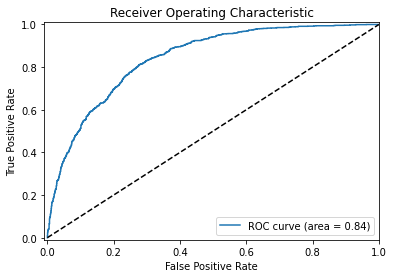

In [63]:
#ROC Curve

#obtaining the probability of churn or not churn for our testing dataset using our fitted model
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#getting the false and true positive rates 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

This model has a precision of 0.73697, which is relatively good. In general, the closer the curve is to the top-left corner, the better the model's performance. None the less, we still want to optimize the model based on recall.